In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned_BA_Reviews.csv",index_col=0)
df.head()

,reviews,verfied,verified,Cleaned Reviews
0,"✅ Trip Verified | BA First, it's not even the...",True,True,ba first even best business class sky cabin lo...
1,✅ Trip Verified | The worst business class ex...,True,True,worst business class experience ground crew si...
2,Not Verified | Quite possibly the worst busin...,False,False,verified quite possibly worst business class e...
3,Not Verified | I will never be flying with BA...,False,False,verified never flying ba first last flying sin...
4,✅ Trip Verified | On the my trip to Mexico Ci...,True,True,trip mexico city opportunity experience ba lon...


In [6]:
pip install vaderSentiment


  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    sentiment = analyser.polarity_scores(review)
    return sentiment['compound']

df["Sentiment"] = df["Cleaned Reviews"].apply(vadersentimentanalysis)

#Function to analyse the sentiment
def analyser_vader(compound):
    if compound>=0.5:
        return "Positive"
    elif compound<0 :
        return "Negative"
    else:
        return "Neutral"
df["Analysis"] = df["Sentiment"].apply(analyser_vader)
df.head(20)

,reviews,verfied,verified,Cleaned Reviews,Sentiment,Analysis
0,"✅ Trip Verified | BA First, it's not even the...",True,True,ba first even best business class sky cabin lo...,0.4148,Neutral
1,✅ Trip Verified | The worst business class ex...,True,True,worst business class experience ground crew si...,0.6597,Positive
2,Not Verified | Quite possibly the worst busin...,False,False,verified quite possibly worst business class e...,0.8399,Positive
3,Not Verified | I will never be flying with BA...,False,False,verified never flying ba first last flying sin...,-0.9186,Negative
4,✅ Trip Verified | On the my trip to Mexico Ci...,True,True,trip mexico city opportunity experience ba lon...,0.9703,Positive
5,✅ Trip Verified | I upgraded at check in to C...,True,True,upgraded check club europe seat excellent expe...,0.9880,Positive
6,✅ Trip Verified | I bought a return trip with...,True,True,bought return trip ba webjet australia last ye...,-0.9022,Negative
7,✅ Trip Verified | Poor from start to finish. ...,True,True,poor start finish six month purchasing ticket ...,-0.9477,Negative
8,✅ Trip Verified | Communication and customer s...,True,True,communication customer service non existent ma...,-0.8934,Negative
9,✅ Trip Verified | That was supposed to be my ...,True,True,supposed flight cancelled hour takeoff nearly ...,-0.6369,Negative


In [15]:
review_counts = df["Analysis"].value_counts()
review_counts

Analysis
Positive    743
Negative    586
Neutral     171
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2f5927c9e90>,
 [Text(0.016126228608851313, 1.0998817867165795, 'Positive'),
  Text(-0.40064930818778843, -1.0244413755060104, 'Negative'),
  Text(1.4516523497929852, -0.5433281286115281, 'Neutral')],
 [Text(0.00879612469573708, 0.599935520027225, '49.5%'),
  Text(-0.21853598628424822, -0.5587862048214601, '39.1%'),
  Text(0.9833773982468608, -0.3680609903497448, '11.4%')])

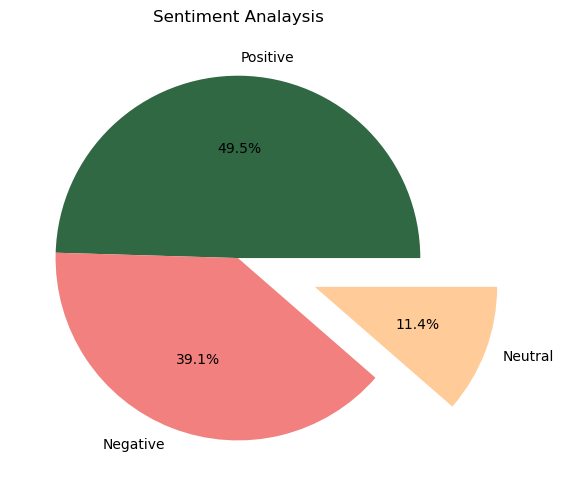

In [53]:
%matplotlib inline
plt.figure(figsize=(20,9))

plt.subplot(1,3,2)
plt.title("Sentiment Analaysis")
plt.pie(review_counts.values, 
        labels =review_counts.index,
        explode = (0,0,0.45),
        colors = ('#306844','#f1807e','#ffcc99'),
        autopct='%1.1f%%', shadow=False)

# Wordcloud

In [35]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


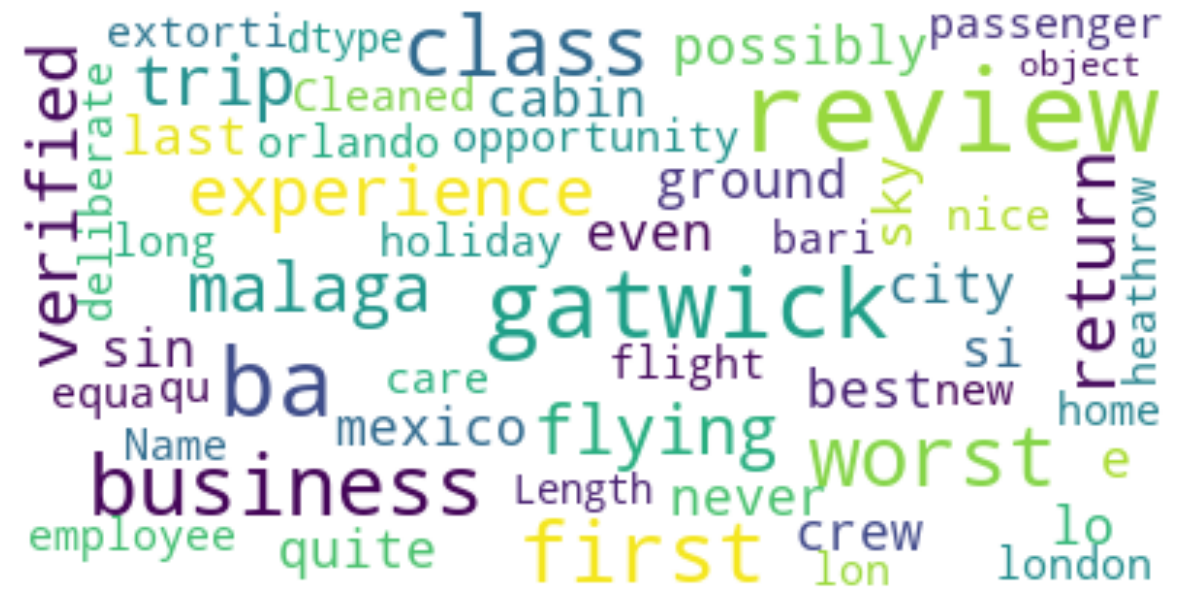

In [49]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud_data(data):
    wordcloud = WordCloud(background_color='white',
                      max_font_size=40,
                      max_words=100,
                      stopwords=stopwords)

    wordcloud = wordcloud.generate(str(data))


    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

show_wordcloud_data(df["Cleaned Reviews"])